# Painting the logo of University of Surrey with a genetic algorithm

In this part, we are going to use a genetic algorithm, in order to create an image that looks like the logo of University of Surrey.

Suppose that we want to use optimisation in order to transform a random set of pixels to an image of the logo of University of Surrey.

The first thing we do is to get the logo file and resize it to a smaller image (16x16).

In [0]:
import numpy as np
from imageio import imread
from skimage.transform import resize
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
img = imread('https://raw.githubusercontent.com/wOOL/COM2028/master/W8/surrey.png')
img = img[:,:,:-1] # the last channel is alpha (transparence) but we do not need it

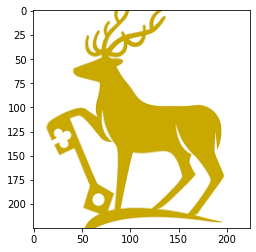

In [30]:
plt.imshow(img)

In [0]:
img = resize(img, (16,16), order=3, mode='constant', anti_aliasing=True)

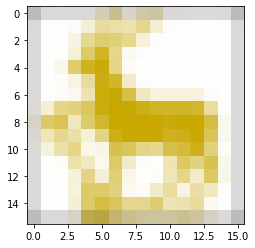

In [32]:
plt.imshow(img)

In [33]:
img_size = img.shape
img_size

(16, 16, 3)

### Our genome (i.e., the representation of a solution is simply a 3D array (Width, Height, Color Channel). At beginning, it does not look like the target image at all

In [0]:
individual = np.random.rand(*img_size)

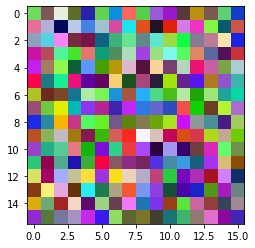

In [35]:
plt.imshow(individual)

### We create 100 individuals that form the population 

In [0]:
num_population = 100

In [0]:
population = np.random.rand(num_population, *img_size)

### Then we define a fitness function that measure how similar of each individual to the target image

In [0]:
def calc_fitness(x, y=img):
    diff = np.abs(x - y[None,:,:,:])
    diff_agg = (diff).mean((1,2,3))
    fitness = 1-diff_agg
    return fitness

### We can see, for now, even the best individual (i.e., the one with the highest fitness score) does not look like Surrey Logo

In [0]:
fitness = calc_fitness(population)

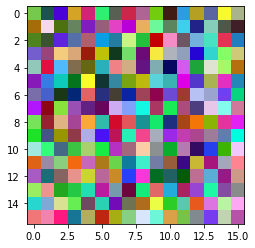

In [40]:
plt.imshow(population[np.argmax(fitness)])

## To implement a genetic algorithm, we need to define three basic functions

### 1. natural selection function: this function will evaluate each individual's fitness, and keep the top 50% with higher scores

In [0]:
def natural_selection(population, target_img=img):
    n = population.shape[0]
    fitness = calc_fitness(population, target_img)
    population = population[np.argsort(fitness)[int(n*0.5):]]
    return population

In [0]:
population = natural_selection(population)

In [43]:
population.shape

(50, 16, 16, 3)

### 2. reproduction function: we pair each of remaining individual to another one, and they will breed two children, those children will be added back to the population
### This can be done by two steps:
### (i) We randomly shuffle the list of individuals (i.e., the first axis of population), then we pair the first with the last, the second with the penultimate, etc. This will make sure that each of individual will be paired with someone else.
### (ii) The parents will have two children via *crossover*, i.e, if parent_1 = [a1, b1, c1, d1, ...] and parent_2 = [a2, b2, c2, d2, ...], their children could be child_1 = [a2, b1, c2, d2] and child_2 = [a1, b2, c1, d1] (another example: child_1 = [a1, b2, c2, d1] and child_2 = [a2, b1, c1, d2]). The way of crossover is random and different for every pair of parents.
### (iii) Finally, we add all children back to the population, so that the number of population remains unchanged.

In [0]:
def reproduction(population):
    np.random.shuffle(population)
    mask = np.random.rand(*population.shape)<0.5
    children = population*mask + population[::-1]*(1-mask)
    population = np.concatenate([population, children], 0)
    return population

In [0]:
population = reproduction(population)

In [46]:
population.shape

(100, 16, 16, 3)

### 3. mutation function: this function will introduce new genes into the population. The way we do it is to replace some genes by random genes. Here we have a concept of mutation rate, which is the chance that a gene is replaced by another random gene. Note that, this would not change the size of population.

In [0]:
def mutation(population, mutation_rate):
    masks = np.random.rand(*population.shape) < mutation_rate
    population = population*(1-masks) + np.random.rand(*population.shape)*masks
    return population

In [0]:
population = mutation(population, mutation_rate=0.01)

In [49]:
population.shape

(100, 16, 16, 3)

## Now we can put everything together, and let the population evolve. For each generation (iteration of algorithm), we run natural_selection, reproduction, and mutation sequentially. We will reduce mutation rate slowly while the algorithm runs (think about why)

In [0]:
population = np.random.rand(num_population, *img_size)

In [0]:
num_generate = 2000

In [0]:
init_mutation_rate = 0.01

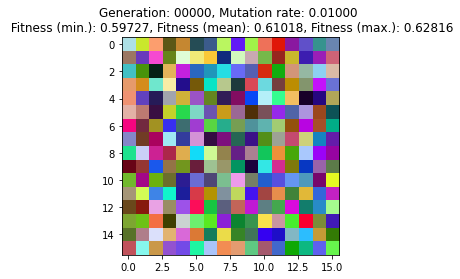

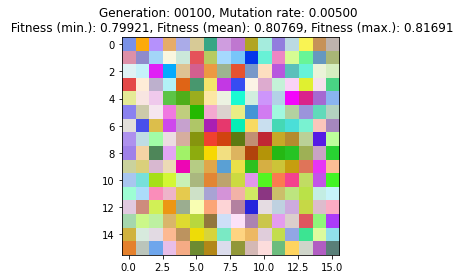

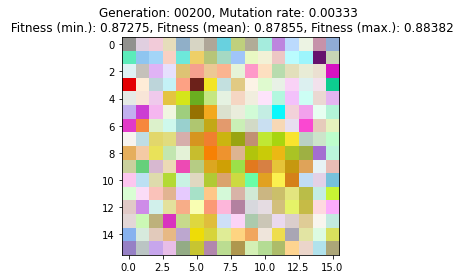

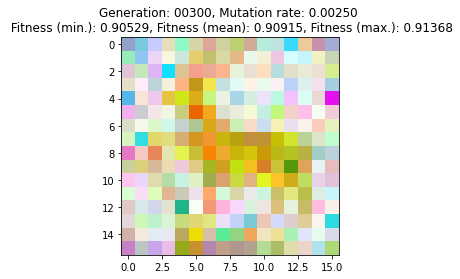

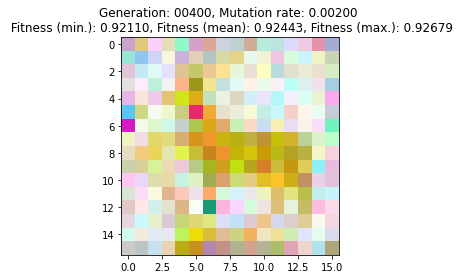

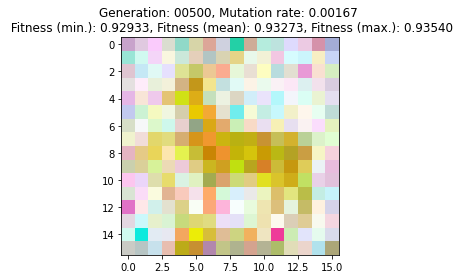

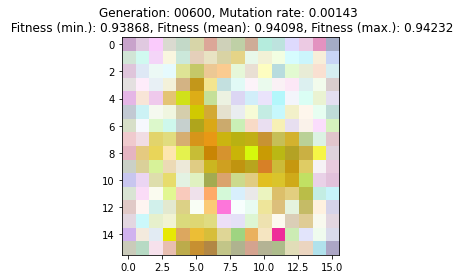

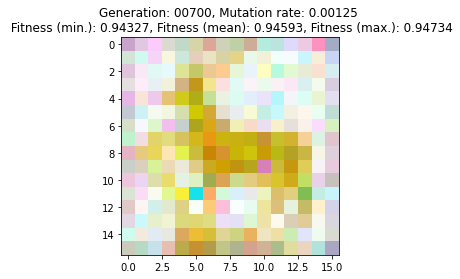

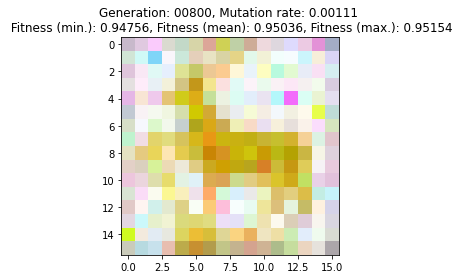

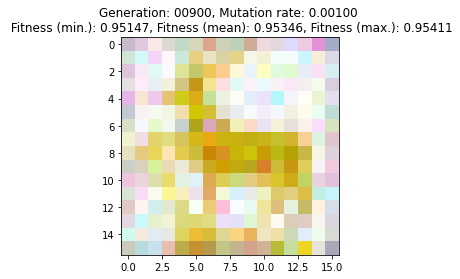

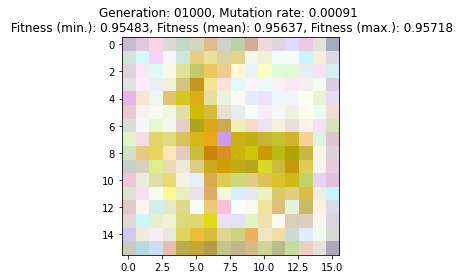

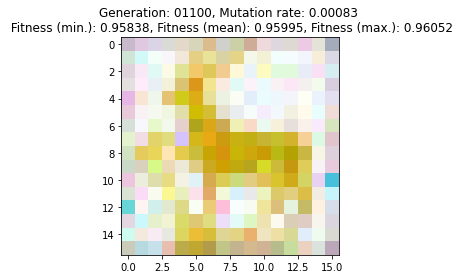

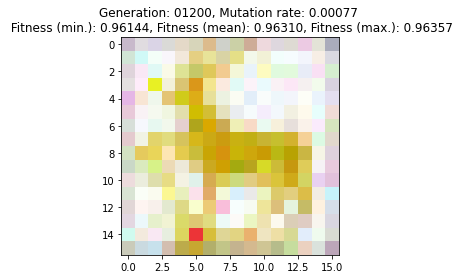

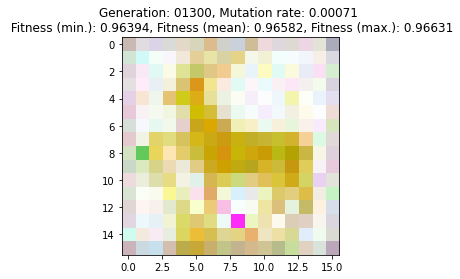

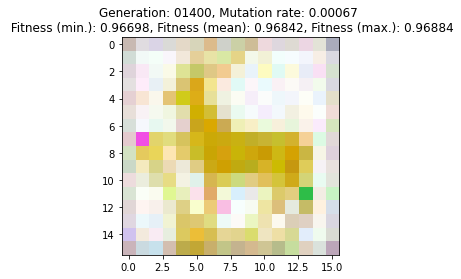

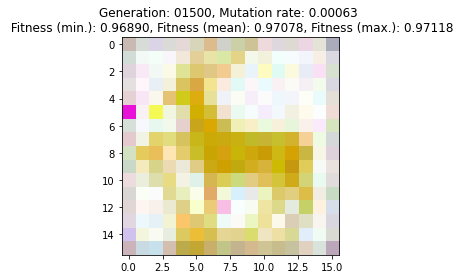

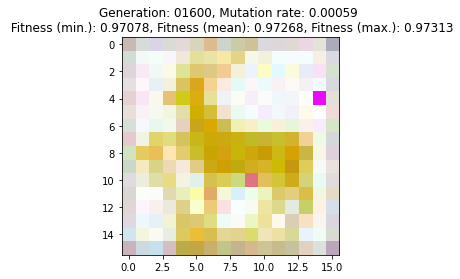

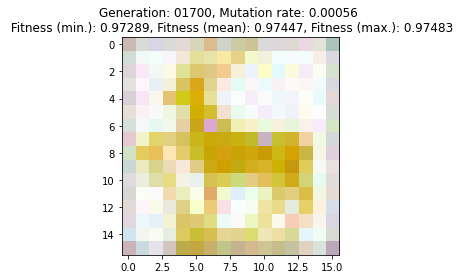

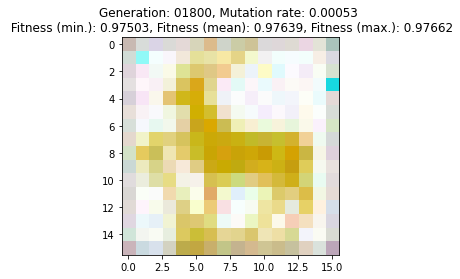

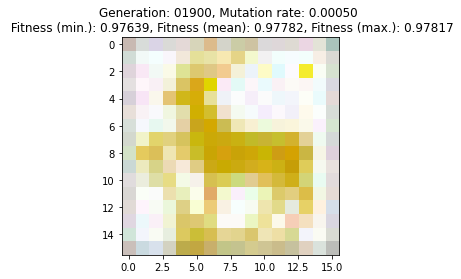

In [53]:
for I in range(num_generate):
    
    population = natural_selection(population, img)
    
    population = reproduction(population)
    
    current_mutation_rate = init_mutation_rate/(int(I/100) + 1)
    population = mutation(population, current_mutation_rate)

    if I % int(num_generate/20) == 0:
        fitness = calc_fitness(population)                                          
        title = 'Generation: %05d, Mutation rate: %.5f \n Fitness (min.): %.5f, Fitness (mean): %.5f, Fitness (max.): %.5f' % (I, current_mutation_rate, fitness.min(), fitness.mean(), fitness.max())
        best = population[np.argsort(fitness)[0]]
        plt.figure()
        plt.imshow(best)
        plt.title(title)
        plt.show()

## Exercises

**Task 1:** Experiment with the another image or image size

**Task 2:** Experiment with different: number of population, number of generations, and init. mutation rate

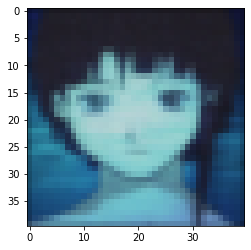

In [54]:
img = imread('https://raw.githubusercontent.com/Satilianius/COM2028/master/lab8/lain.jpg')
img = resize(img, (40,40), order=3, mode='constant', anti_aliasing=True)
img_size = img.shape
plt.imshow(img)

iteration 1, initial mutation rate: 0.02
iteration 2, initial mutation rate: 0.01
iteration 3, initial mutation rate: 0.005
iteration 4, initial mutation rate: 0.003
iteration 5, initial mutation rate: 0.001


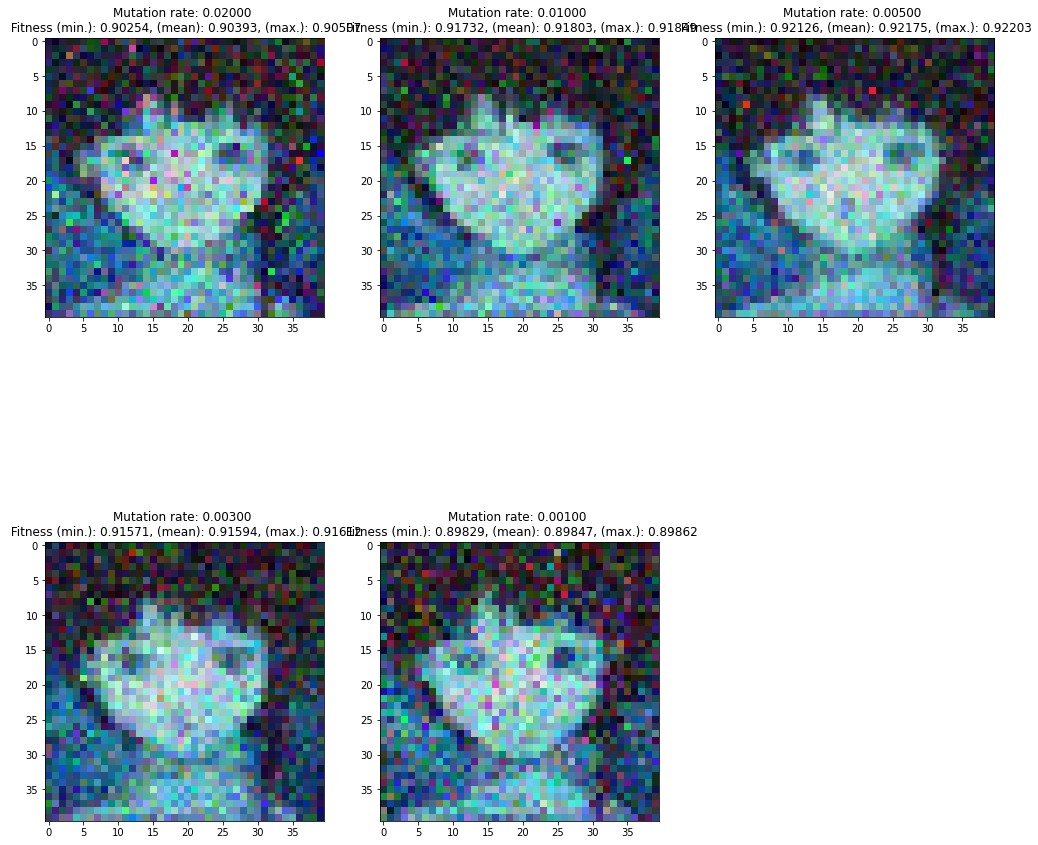

In [76]:
from math import ceil
# Changing mutation rate
# it will take about 4-5 minutes to run, but will show the difference in one plot
num_generate = 1500
mutation_rates = [0.02, 0.01, 0.005, 0.003, 0.001]

plt.figure(num=1, figsize=(17, 17))
n_of_columns = 3
n_of_rows = ceil(len(mutation_rates) / float(n_of_columns))

for subplot_id in range(1, len(mutation_rates) + 1):
  population = np.random.rand(num_population, *img_size)
  init_mutation_rate = mutation_rates[subplot_id - 1]
  print (f"iteration {subplot_id}, initial mutation rate: {init_mutation_rate}")
  
  for I in range(num_generate):
    
    population = natural_selection(population, img)
    
    population = reproduction(population)
    
    current_mutation_rate = init_mutation_rate/(int(I/100) + 1)
    population = mutation(population, current_mutation_rate)

  fitness = calc_fitness(population, img)                                          
  title = 'Mutation rate: %.5f \n Fitness (min.): %.5f, (mean): %.5f, (max.): %.5f' % (init_mutation_rate, fitness.min(), fitness.mean(), fitness.max())
  best = population[np.argsort(fitness)[0]]
  plt.subplot(n_of_rows, n_of_columns, subplot_id)
  plt.imshow(best)
  plt.title(title)
plt.show()

iteration 1, population_size: 20
iteration 2, population_size: 50
iteration 3, population_size: 100
iteration 4, population_size: 130
iteration 5, population_size: 150
iteration 6, population_size: 200


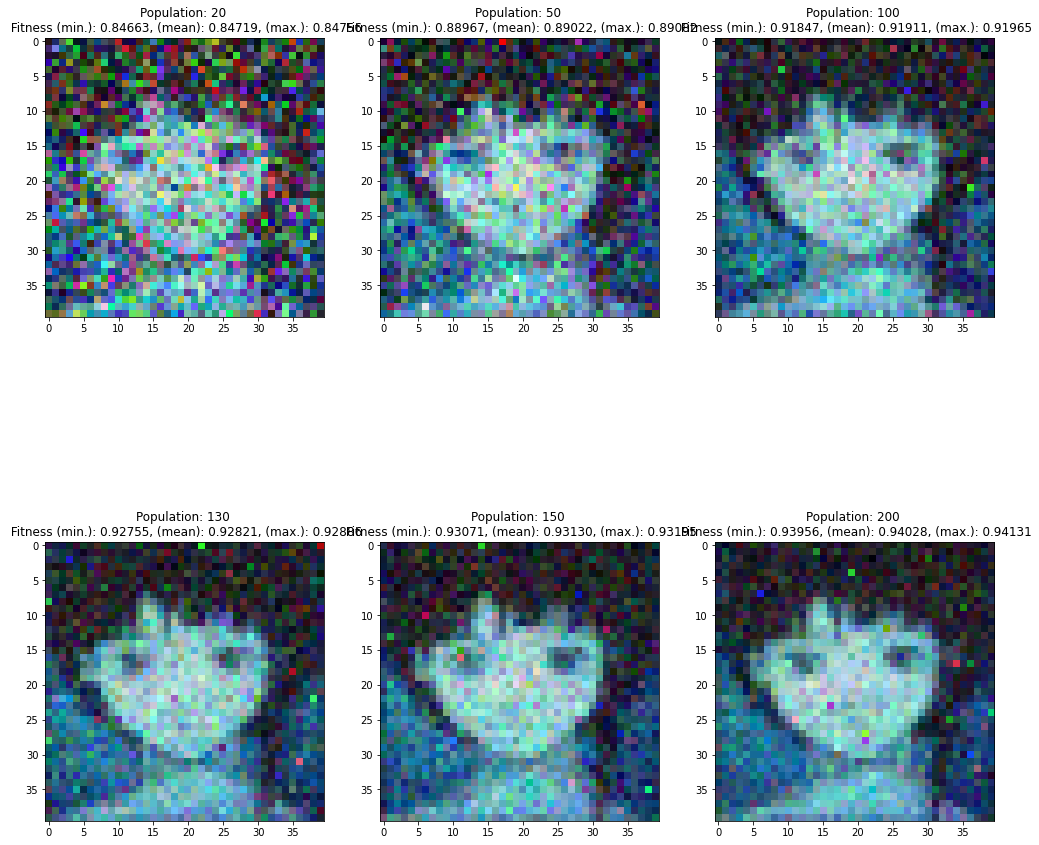

In [75]:
from math import ceil
# Changing population_size
population_sizes = [20, 50, 100, 130, 150, 200]
num_generate = 1500
init_mutation_rate = 0.01

plt.figure(num=1, figsize=(17, 17))
n_of_columns = 3
n_of_rows = ceil(len(population_sizes) / float(n_of_columns))

for subplot_id in range(1, len(population_sizes) + 1):
  population_size = population_sizes[subplot_id-1]
  population = np.random.rand(population_size, *img_size)
  print (f"iteration {subplot_id}, population_size: {population_size}")

  for I in range(num_generate):
    
    population = natural_selection(population, img)
    
    population = reproduction(population)
    
    current_mutation_rate = init_mutation_rate/(int(I/100) + 1)
    population = mutation(population, current_mutation_rate)

  fitness = calc_fitness(population, img)                                          
  title = 'Population: %i \n Fitness (min.): %.5f, (mean): %.5f, (max.): %.5f' % (population_size, fitness.min(), fitness.mean(), fitness.max())
  best = population[np.argsort(fitness)[0]]
  plt.subplot(n_of_rows, n_of_columns, subplot_id)
  plt.imshow(best)
  plt.title(title)
plt.show()

iteration 1, num_generate: 1000
iteration 2, num_generate: 1500
iteration 3, num_generate: 2000
iteration 4, num_generate: 2500
iteration 5, num_generate: 3000


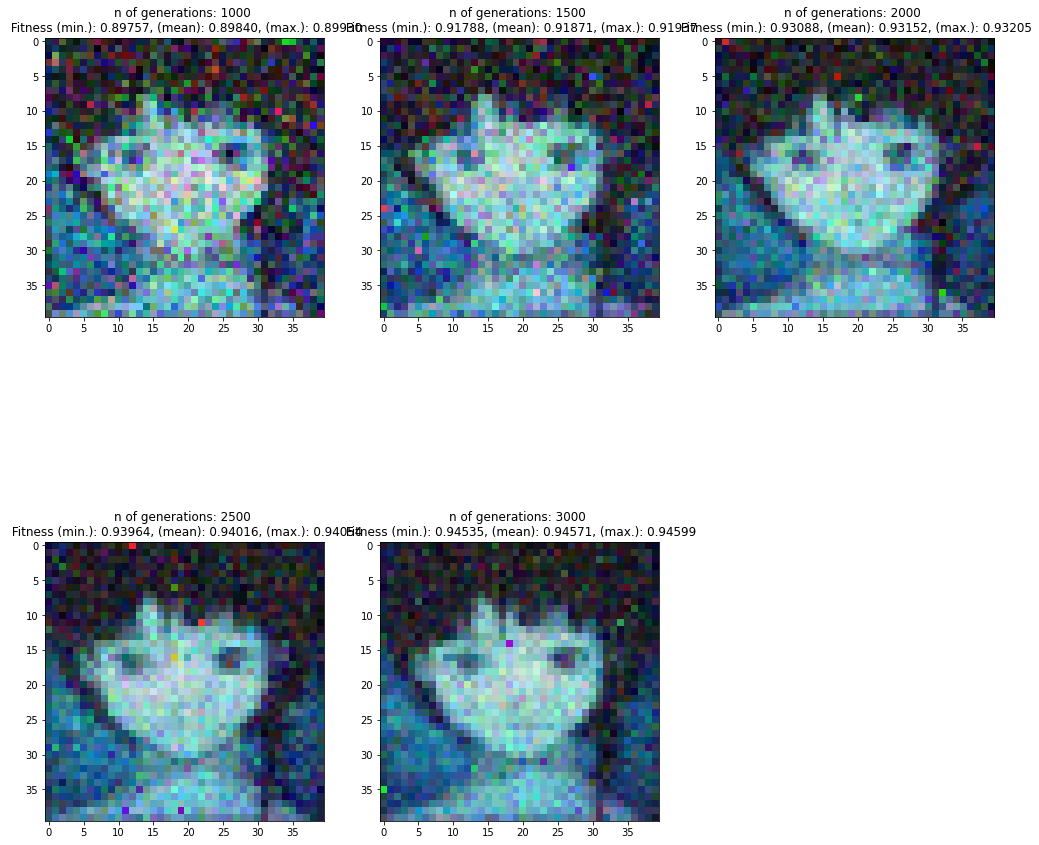

In [77]:
from math import ceil
# Changing number of generations
n_of_generations = [1000, 1500, 2000, 2500, 3000]
population_size = 100
init_mutation_rate = 0.01

plt.figure(num=1, figsize=(17, 17))
n_of_columns = 3
n_of_rows = ceil(len(n_of_generations) / float(n_of_columns))

for subplot_id in range(1, len(n_of_generations) + 1):
  population = np.random.rand(population_size, *img_size)
  num_generate = n_of_generations[subplot_id-1]
  print (f"iteration {subplot_id}, num_generate: {num_generate}")

  for I in range(num_generate):
    
    population = natural_selection(population, img)
    
    population = reproduction(population)
    
    current_mutation_rate = init_mutation_rate/(int(I/100) + 1)
    population = mutation(population, current_mutation_rate)

  fitness = calc_fitness(population, img)                                          
  title = 'n of generations: %i \n Fitness (min.): %.5f, (mean): %.5f, (max.): %.5f' % (num_generate, fitness.min(), fitness.mean(), fitness.max())
  best = population[np.argsort(fitness)[0]]
  plt.subplot(n_of_rows, n_of_columns, subplot_id)
  plt.imshow(best)
  plt.title(title)
plt.show()